![Mind Mapping](https://raw.githubusercontent.com/zacdeng/Machine-Learning/master/images/hw2.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv('./hw2/train.csv')

# Data analysis

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

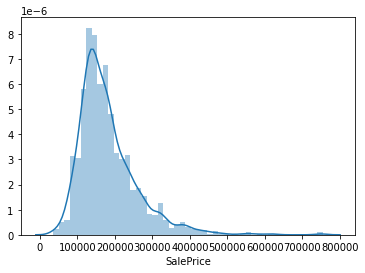

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
df_train['SalePrice'].skew()

1.8828757597682129

In [7]:
df_train['SalePrice'].kurt()

6.536281860064529

The data conforms to the characteristics of normal distribution, but the skewness is relatively large, so the normal distribution change needs to be processed

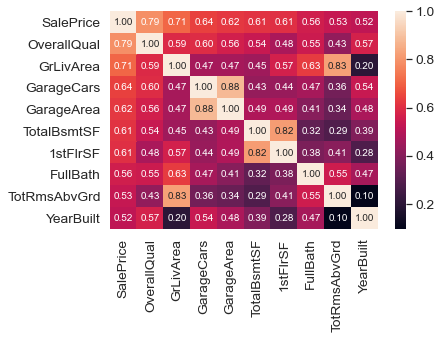

In [8]:
k = 10
corrmat = df_train.corr()
cols = corrmat.sort_values('SalePrice',ascending=False).head(k).index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* calculate the correlation of each tables

In [9]:
corrmat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [10]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

* using np.corrcoef() to calculate the Person's r among top 10 
* then using sns.heatmap() to describe it

In [11]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


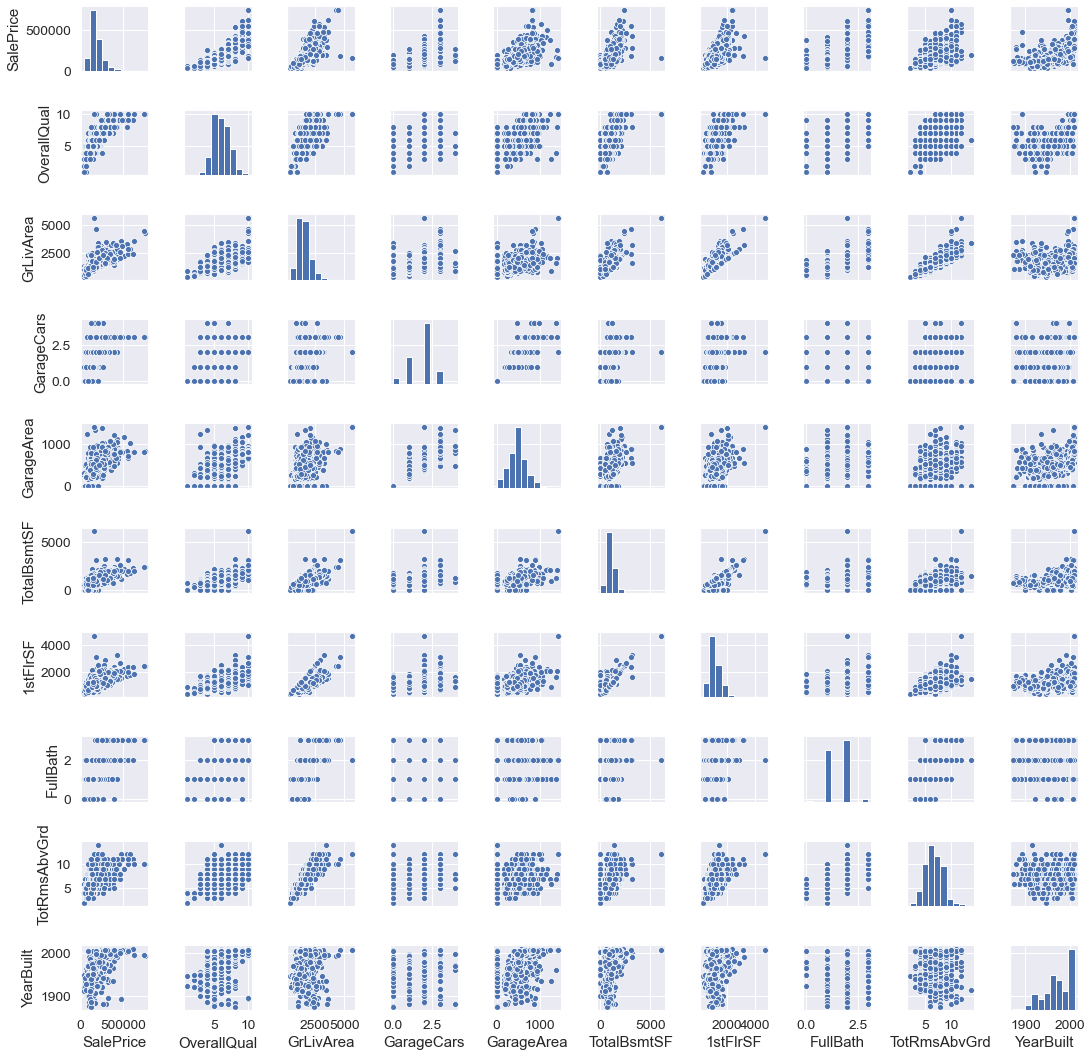

In [12]:
sns.pairplot(df_train[cols],size=1.5)

# Data preprocessing

### Adjust the distribution of SalePrice


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

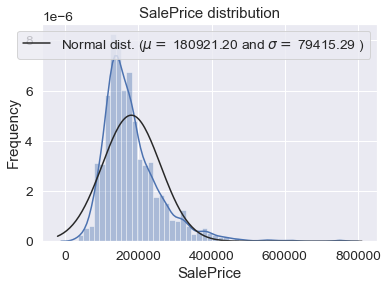

In [13]:
from scipy.stats import norm

sns.distplot(df_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


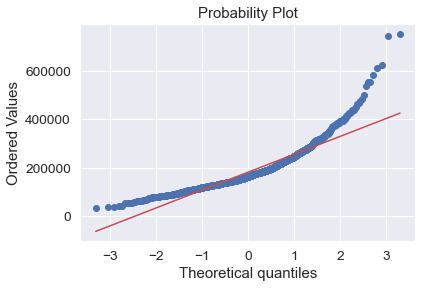

In [14]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Logarithmic transformation： x = log（1+x）


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

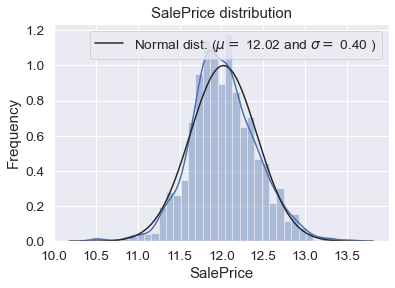

In [15]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

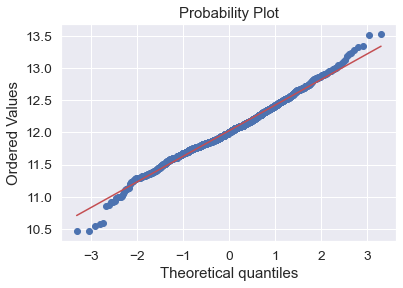

In [16]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

* 计算各特征值缺失数，得出百分比并合并汇表

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


* 加载test和train
* 在数据表格中去掉ID （引出保留）

In [18]:
train = pd.read_csv('./hw2/train.csv')
train_price = train['SalePrice']
validation = pd.read_csv('./hw2/test.csv')
validation_price = pd.read_csv('./hw2/sample_submission.csv')
validation['SalePrice'] = validation_price['SalePrice']
all_data = pd.concat((train,validation))

In [19]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


In [20]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [21]:
validation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


* 计算Misiing Ratio
* 删掉缺失值为0的特征值

In [22]:
all_data_na = (all_data.isnull().sum() / all_data.isnull().count()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
# 删掉缺失值为0的特征值
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

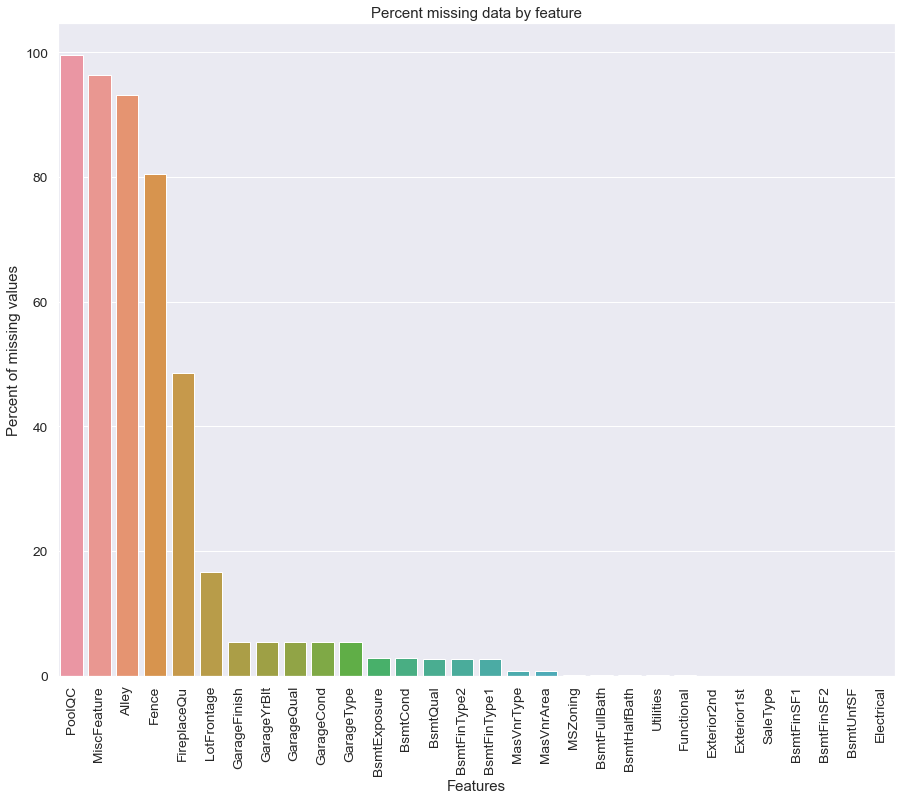

In [23]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

将表示时间等非连续型int数据转化成str

# Model Training

In [24]:
from sklearn.model_selection import train_test_split
data = all_data

In [25]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

data['OverallCond'] = data['OverallCond'].astype(str)

data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

用平均值填补缺失值

In [26]:
x = data.loc[:,data.columns!='SalePrice']
mean_cols=x.mean()
x = x.fillna(mean_cols)  #填充缺失值

将合并后的数据集的非连续值通过pd.get_dummies将数据转换成one-hot编码，防止test和train特征值描述不同而产生的矩阵维度不对应

In [27]:
x_dum = pd.get_dummies(x)

In [28]:
train_x = x_dum[:1460]
test_x = x_dum[1460:]
train_y = train_price

划分训练集和验证集

In [29]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = 0.3,random_state = 1)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor


In [31]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
names=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging']
score_=[]

In [32]:
def try_different_method(name,model):
    model.fit(x_train,y_train)
    SalePrice = model.predict(x_test)
    score = model.score(x_test,y_test)
    score_.append(str(score))
    print("Start " + name +'. \n')

In [33]:
for name,model in zip(names,models):
    try_different_method(name,model)

Start LinearRegression. 

Start KNNRegressor. 



D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Start SVR. 

Start Ridge. 



D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174062306945.35287, tolerance: 607954694.1504303
  positive)


Start Lasso. 



D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Start MLPRegressor. 

Start DecisionTree. 

Start ExtraTree. 

Start RandomForest. 

Start AdaBoost. 

Start GradientBoost. 

Start Bagging. 



In [34]:
scores = pd.DataFrame({'methods':names,'score':score_})
scores.set_index('methods',inplace=True)
scores

,score
methods,
LinearRegression,0.8516680676085692
KNNRegressor,0.607253806655577
SVR,-0.03796277390969505
Ridge,0.8741245921396597
Lasso,0.8696825576780517
MLPRegressor,0.6191154449688769
DecisionTree,0.8217558907546367
ExtraTree,0.6947586918672801
RandomForest,0.8828242709716365


# Model Testing

In [35]:
result = {}

def Predict(name, model):
    ret = model.predict(test_x)
    result[name] = ret
    frame = pd.DataFrame({'SalePrice':ret})
    print(frame)
    plt.figure(figsize=(25,10))
    plt.plot(np.arange(1461,1461+len(validation_price)), validation_price['SalePrice'], 'yo-', label='true value')
    plt.plot(np.arange(1461,1461+len(validation_price)), ret, 'o-', label='predict value')
    plt.xlabel("Houses' ID")
    plt.ylabel('SalePrice Prediction')
    plt.title('The Pridiction of SalePrice.')
    plt.legend()
    print(name)
    plt.show()

          SalePrice
0     131984.684140
1     161711.246593
2     191685.538041
3     198039.413099
4     216394.373879
...             ...
1454   94131.389114
1455   77885.694608
1456  184970.534770
1457  118937.988104
1458  219481.593102

[1459 rows x 1 columns]
LinearRegression


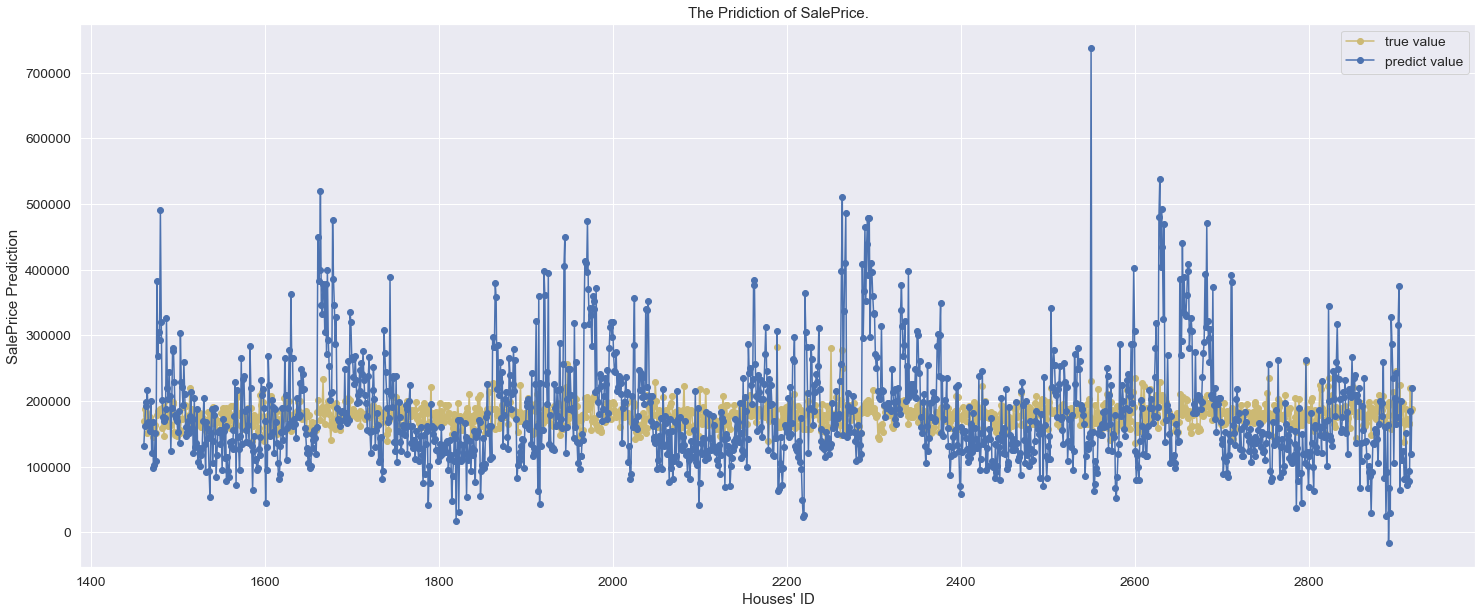

      SalePrice
0      154640.0
1      187680.0
2      181960.0
3      198360.0
4      167960.0
...         ...
1454   109200.0
1455   121800.0
1456   230094.0
1457   131400.0
1458   226860.0

[1459 rows x 1 columns]
KNNRegressor


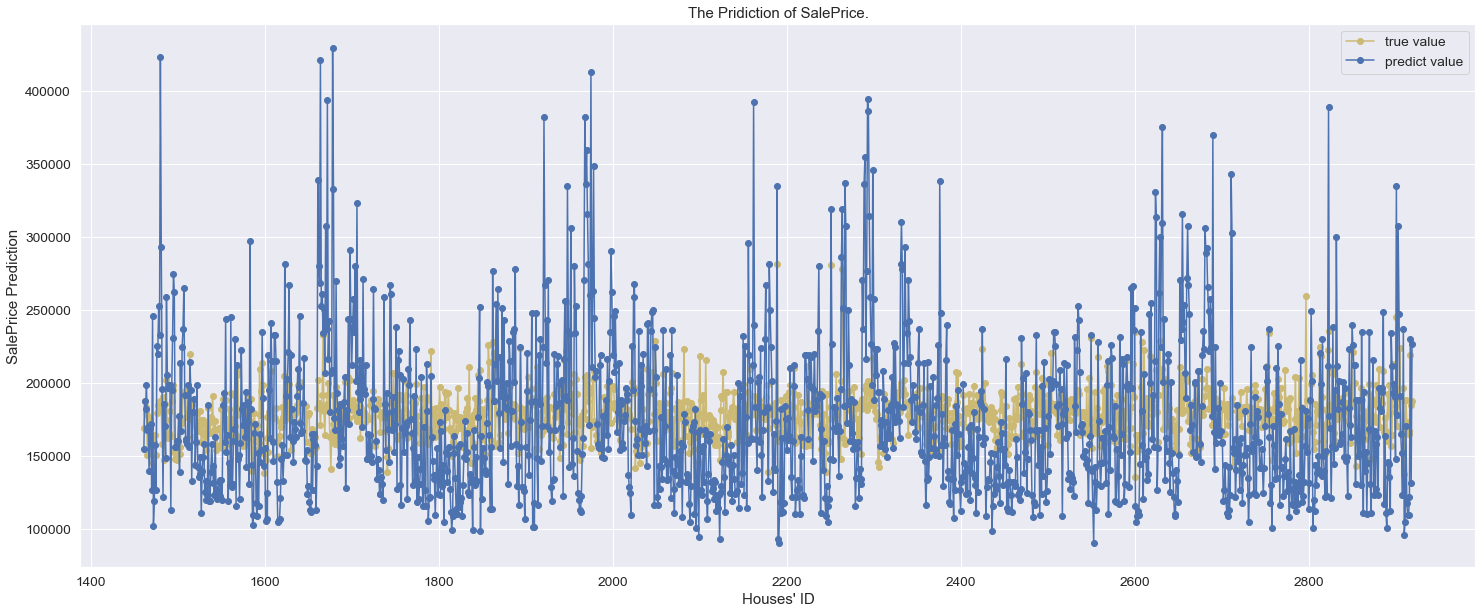

      SalePrice
0      163250.0
1      163250.0
2      163250.0
3      163250.0
4      163250.0
...         ...
1454   163250.0
1455   163250.0
1456   163250.0
1457   163250.0
1458   163250.0

[1459 rows x 1 columns]
SVR


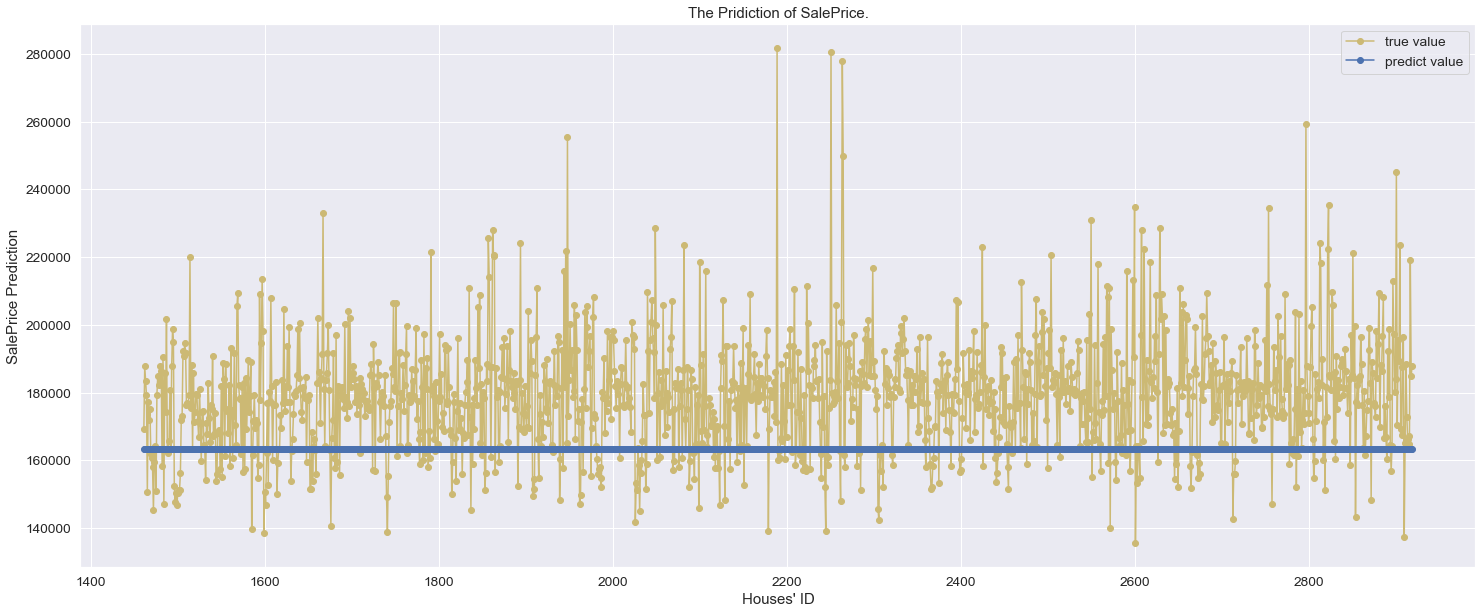

          SalePrice
0     119792.107222
1     159651.910567
2     176477.251548
3     192075.396224
4     218033.415897
...             ...
1454   83184.445076
1455   76265.349370
1456  162825.354647
1457  109175.161834
1458  219538.884204

[1459 rows x 1 columns]
Ridge


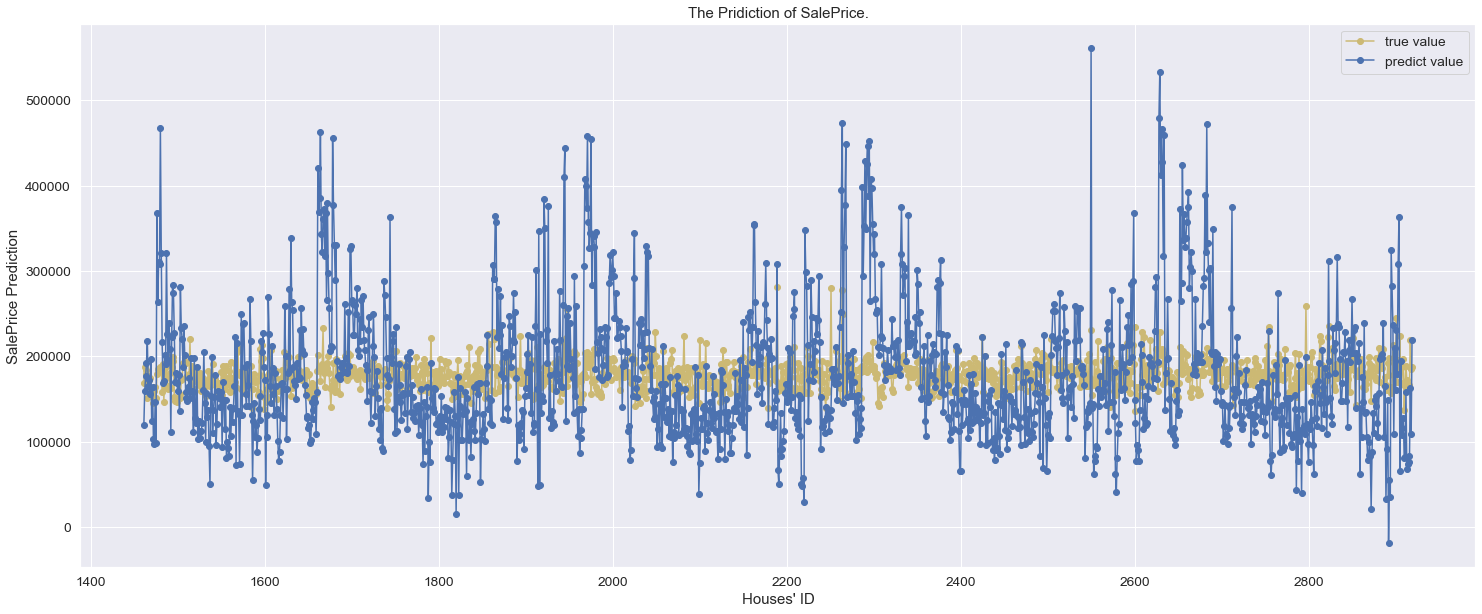

          SalePrice
0     132091.812398
1     163753.391653
2     191423.779150
3     197580.580766
4     216220.450313
...             ...
1454   93585.449613
1455   79030.150875
1456  184354.811036
1457  118365.889123
1458  219407.799230

[1459 rows x 1 columns]
Lasso


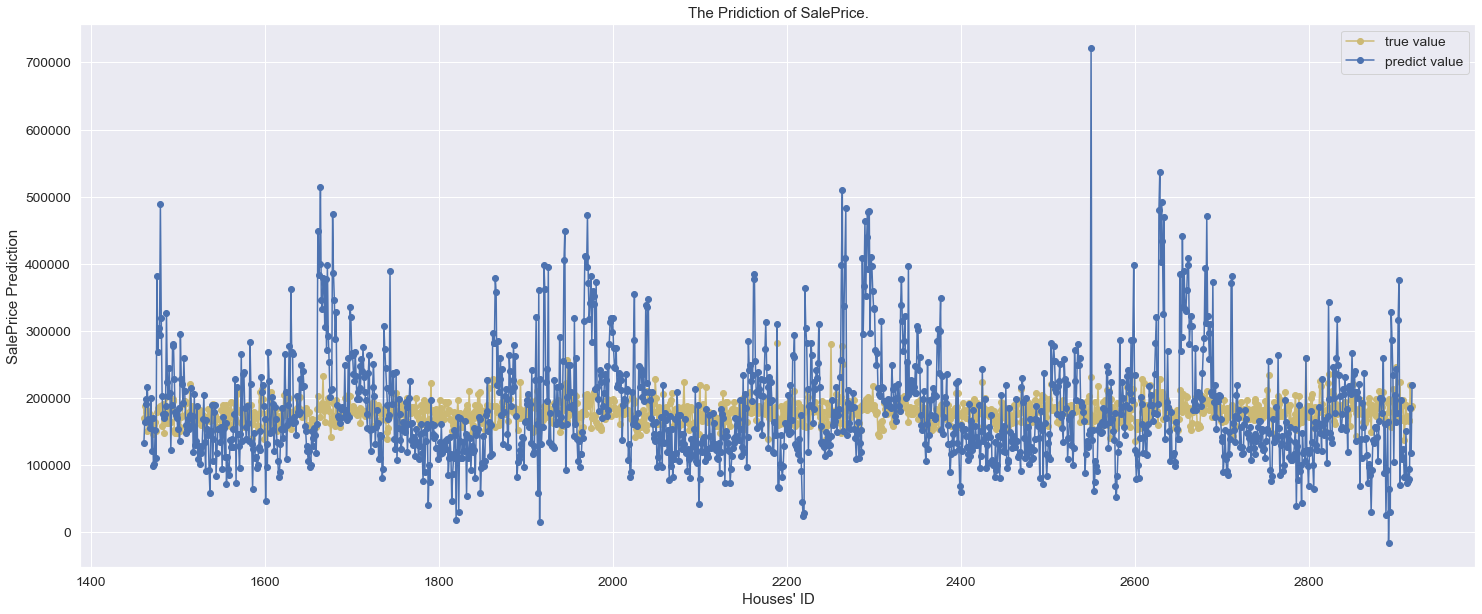

          SalePrice
0     157744.347904
1     162383.143142
2     192637.588388
3     193355.678822
4     178376.327666
...             ...
1454  136218.606734
1455  143539.507719
1456  201395.576648
1457  147997.401046
1458  223119.668926

[1459 rows x 1 columns]
MLPRegressor


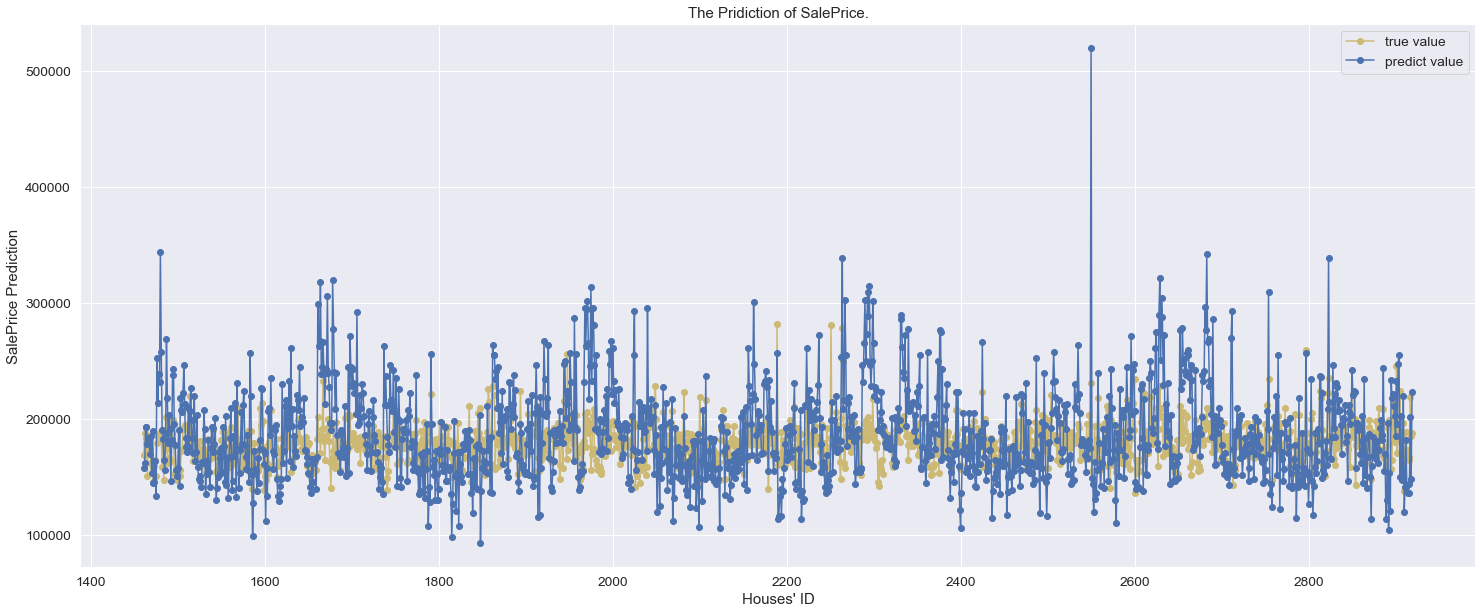

      SalePrice
0      148500.0
1      157900.0
2      192000.0
3      167000.0
4      180000.0
...         ...
1454    75000.0
1455    81000.0
1456   121500.0
1457   127000.0
1458   269790.0

[1459 rows x 1 columns]
DecisionTree


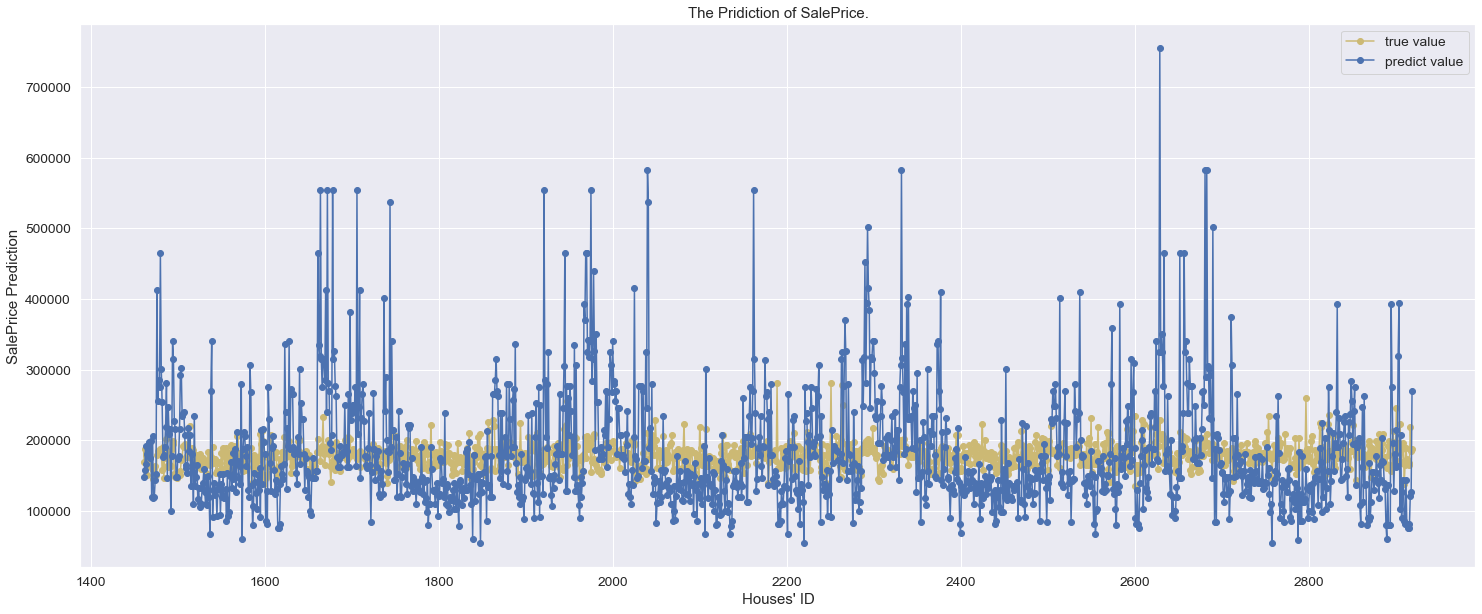

      SalePrice
0       80000.0
1      149350.0
2      185000.0
3      193500.0
4      170000.0
...         ...
1454    81000.0
1455    75000.0
1456   130000.0
1457   127500.0
1458   192000.0

[1459 rows x 1 columns]
ExtraTree


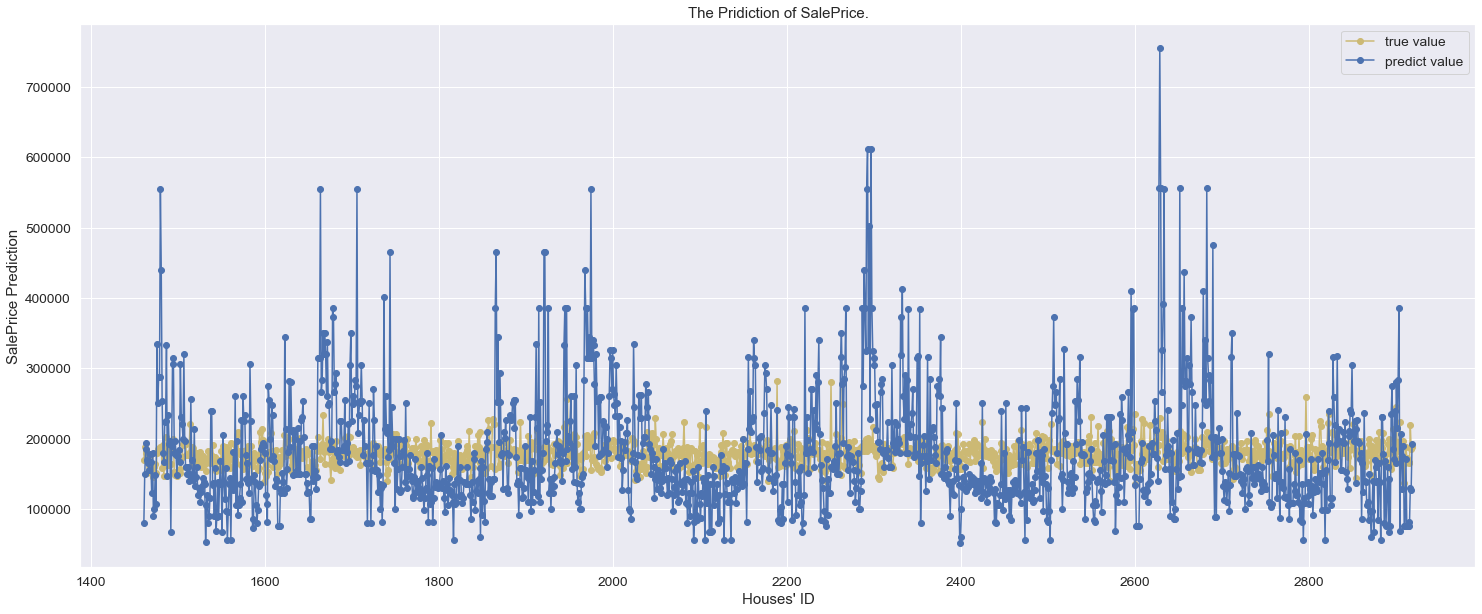

      SalePrice
0      127415.0
1      150845.0
2      196914.0
3      197240.0
4      203240.0
...         ...
1454    84740.0
1455    87890.0
1456   153140.0
1457   119335.0
1458   248347.0

[1459 rows x 1 columns]
RandomForest


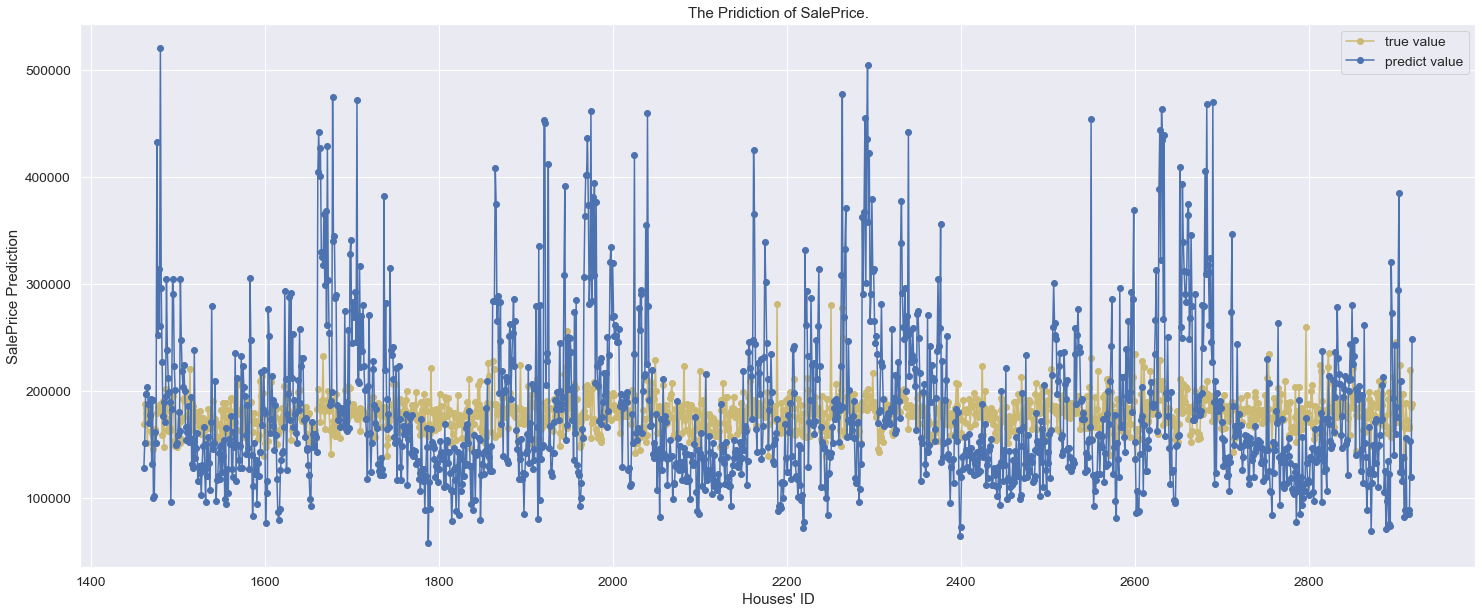

          SalePrice
0     127381.456954
1     147471.842105
2     191516.250000
3     214298.536585
4     219707.258065
...             ...
1454  121902.050360
1455  121902.050360
1456  149698.096639
1457  131106.024331
1458  245202.047059

[1459 rows x 1 columns]
AdaBoost


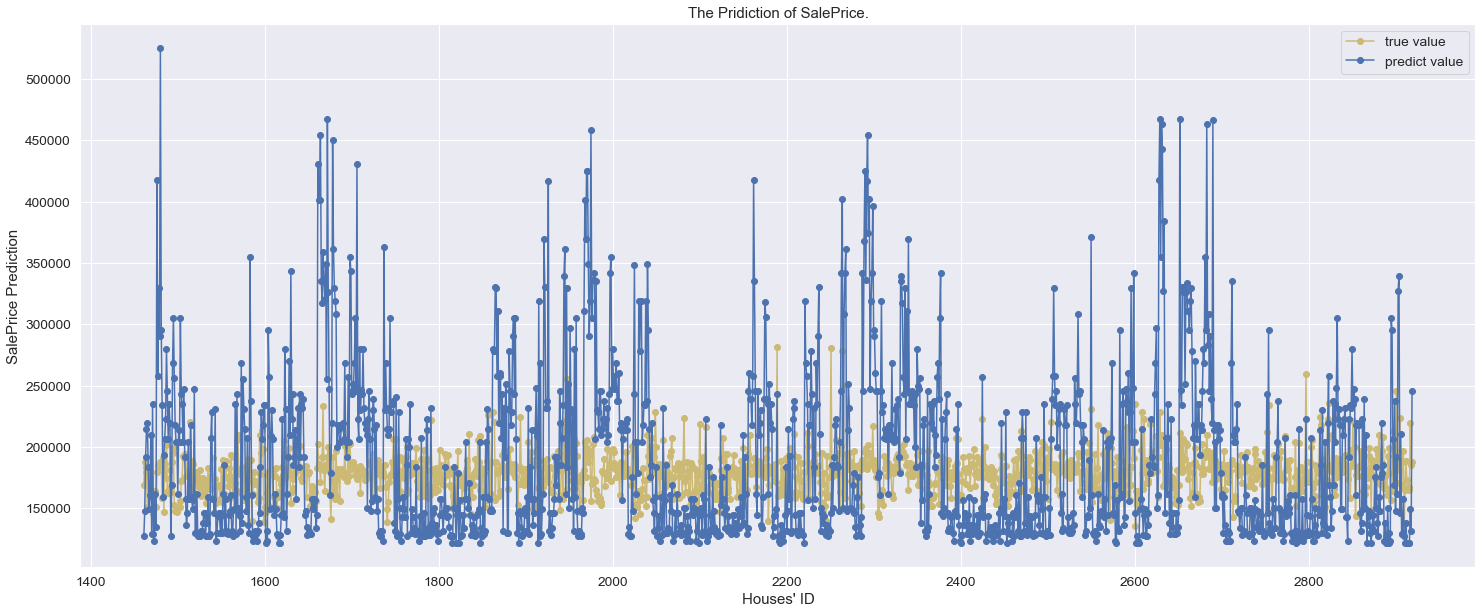

          SalePrice
0     126205.389342
1     162157.794057
2     186401.821924
3     182578.575467
4     196289.342653
...             ...
1454   82332.133963
1455   86529.345660
1456  148662.850545
1457  122286.124275
1458  240835.748911

[1459 rows x 1 columns]
GradientBoost


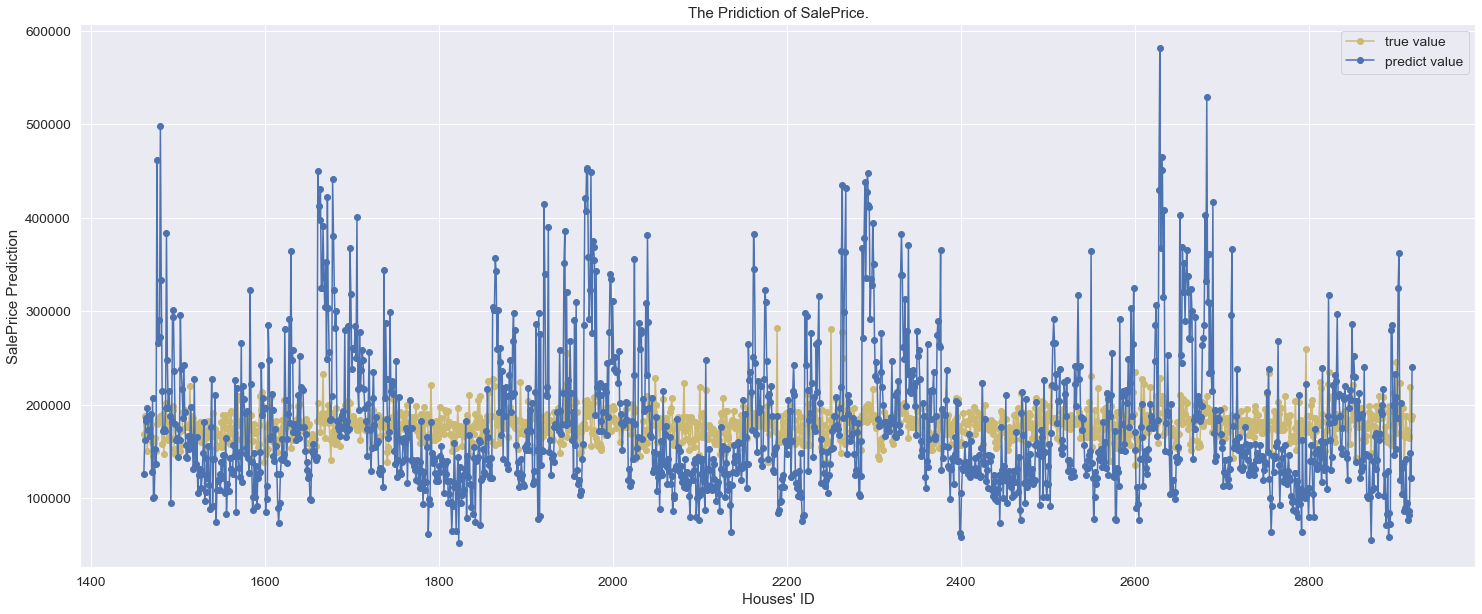

      SalePrice
0      121100.8
1      148690.0
2      190290.0
3      190690.0
4      217540.0
...         ...
1454    85250.0
1455    89400.0
1456   150597.5
1457   115470.0
1458   224490.0

[1459 rows x 1 columns]
Bagging


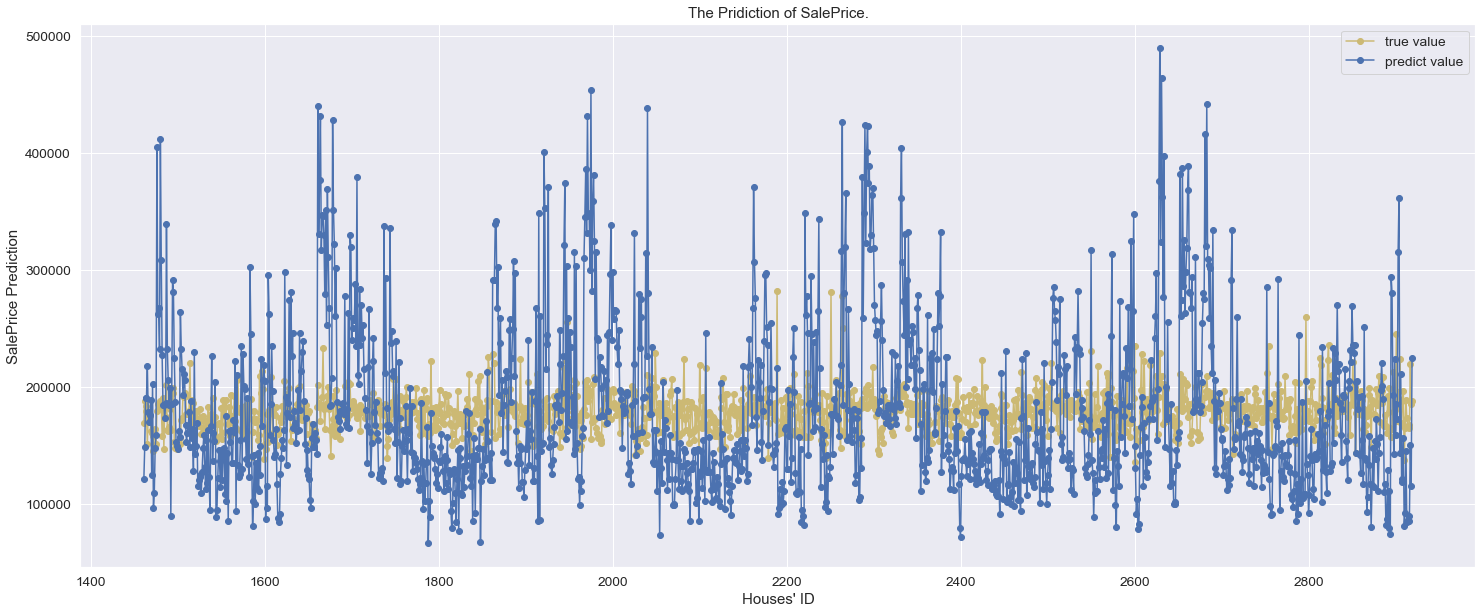

In [36]:
for name, model in zip(names,models):
    Predict(name,model)

In [37]:
result

{'LinearRegression': array([131984.68413992, 161711.24659288, 191685.5380409 , ...,
        184970.5347696 , 118937.98810438, 219481.59310244]),
 'KNNRegressor': array([154640., 187680., 181960., ..., 230094., 131400., 226860.]),
 'SVR': array([163250., 163250., 163250., ..., 163250., 163250., 163250.]),
 'Ridge': array([119792.10722151, 159651.91056722, 176477.2515479 , ...,
        162825.35464684, 109175.16183352, 219538.88420401]),
 'Lasso': array([132091.81239809, 163753.3916531 , 191423.77914971, ...,
        184354.81103564, 118365.88912264, 219407.79922956]),
 'MLPRegressor': array([157744.34790384, 162383.14314158, 192637.58838782, ...,
        201395.57664768, 147997.40104649, 223119.66892553]),
 'DecisionTree': array([148500., 157900., 192000., ..., 121500., 127000., 269790.]),
 'ExtraTree': array([ 80000., 149350., 185000., ..., 130000., 127500., 192000.]),
 'RandomForest': array([127415., 150845., 196914., ..., 153140., 119335., 248347.]),
 'AdaBoost': array([127381.456953

Save as the csv file

In [38]:
for name, ret in result.items():
    CSV = pd.DataFrame({'SalePrice':ret})
    path = './hw2/%s.csv' % name
    CSV.to_csv(path)